# Simple linear regression - Exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size.csv'. 

You are expected to create a simple linear regression (similar to the one in the lecture), using the new data. 

Apart from that, please:
-  Create a scatter plot (with or without a regression line)
-  Calculate the R-squared
-  Display the intercept and coefficient(s)
-  Using the model make a prediction about an apartment with size 750 sq.ft.

Note: In this exercise, the dependent variable is 'price', while the independent variable is 'size'.

Good luck!

## Import the relevant libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn
seaborn.set()

## Load the data

In [6]:
data = pd.read_csv('real_estate_price_size.csv')

In [7]:
data.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


## Create the regression

### Declare the dependent and the independent variables

In [8]:
x = data['size']
y = data['price']

### Explore the data

In [9]:
x.shape

(100,)

### Transform the inputs into a matrix (2D object)

In [10]:
x_matrix = x.values.reshape(-1,1)
y_matrix = y.values.reshape(-1,1)

### Regression itself

In [20]:
sm.add_constant(x)
result = sm.OLS(y,x).fit()
result.summary()

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              3352.
Date:                Sat, 07 Dec 2019   Prob (F-statistic):                    3.68e-78
Time:                        16:22:31   Log-Likelihood:                         -1226.2
No. Observations:                 100   AIC:                                      2454.
Df Residuals:                      99   BIC:                                      2457.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
size         329.7765      5.696     57.896      0.000     318.474     341.079
==============================================================================
Omnibus:                        1.877   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.391   Jarque-Bera (JB):                1.730
Skew:                          -0.320   Prob(JB):                        0.421
Kurtosis:                       2.922   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
reg = LinearRegression()
reg.fit(x_matrix,y_matrix)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Calculate the R-squared

In [13]:
reg.score(x_matrix,y_matrix)

0.7447391865847586

### Find the intercept

In [14]:
reg.intercept_

array([101912.60180123])

### Find the coefficients

In [15]:
reg.coef_

array([[223.17874259]])

### Making predictions

You find an apartment online with a size of 750 sq.ft.

All else equal what should be its price according to the model?

In [16]:
reg.predict([[750]])

array([[269296.65874718]])

In [17]:
prediction = pd.DataFrame(data = [750,1000], columns = ['Size(sq. ft)'])

In [18]:
prediction['predicted_price'] = reg.predict(prediction)
prediction

,Size(sq. ft),predicted_price
0,750,269296.658747
1,1000,325091.344396


### Creating a scatter plot 

Text(0, 0.5, 'PRICE')

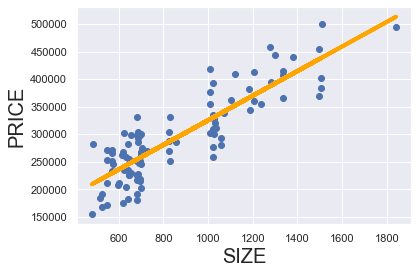

In [19]:
plt.scatter(x,y)
yhat = reg.intercept_ + reg.coef_ * x_matrix
fig1 = plt.plot(x,yhat,lw =4, c='orange', label= 'regression line')
plt.xlabel('SIZE', fontsize = 20)
plt.ylabel('PRICE', fontsize = 20)